# Notebook that uses torch hub + Ultralytics YOLO Models
## PyTorch Implementation:

For applications requiring YOLO implementations within a PyTorch environment, the Ultralytics organization provides a pre-trained (upto) YOLOv5 model readily accessible through the PyTorch Hub: https://pytorch.org/hub/ultralytics_yolov5/. This resource offers a convenient starting point for leveraging YOLOv5 functionalities.

# References
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#12-create-labels
- https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/
- https://pytorch.org/hub/ultralytics_yolov5/

# Inference

In [32]:
from ultralytics import YOLO
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)

# Images
imgs = ['https://ultralytics.com/images/zidane.jpg', 'https://ultralytics.com/images/bus.jpg']  # batch of images

# Inference
results = model(imgs, size=640)

# Results
results.print()
results.save()  # or .show()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/jupyter/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-27 Python-3.10.0 torch-2.2.2 CUDA:0 (Tesla T4, 14931MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 1411.1ms pre-process, 3.7ms inference, 8.4ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp8


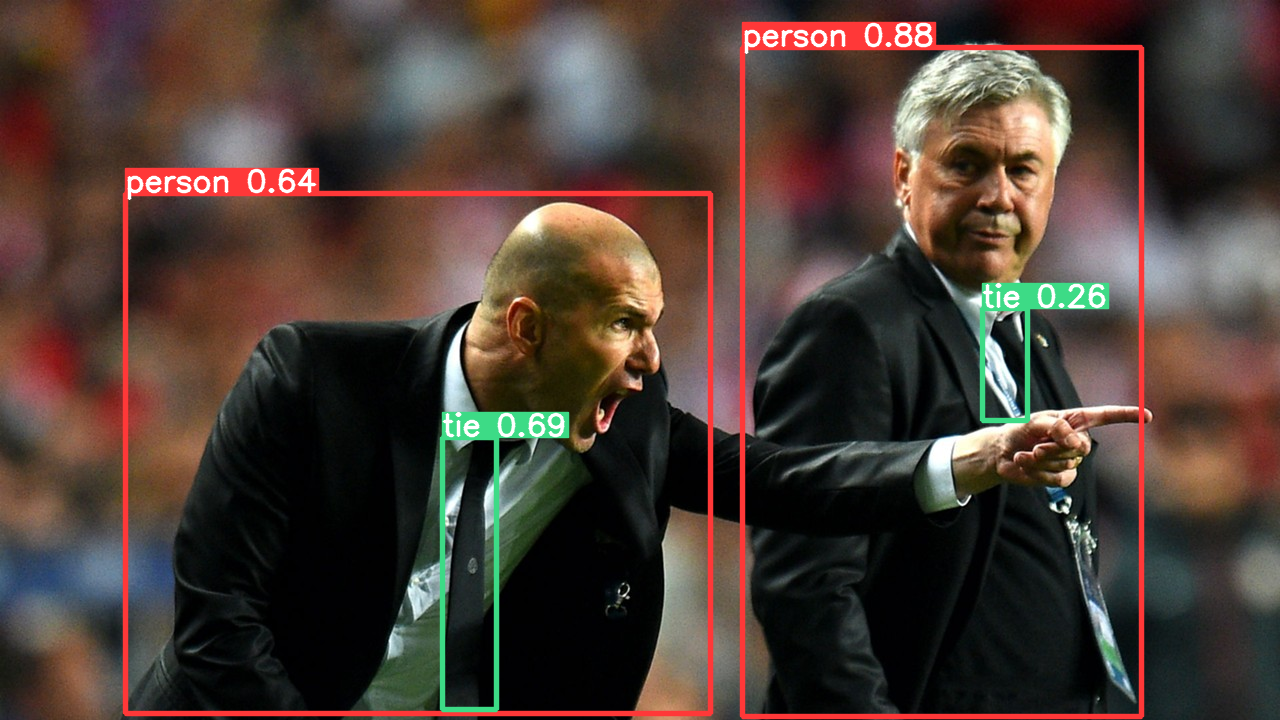

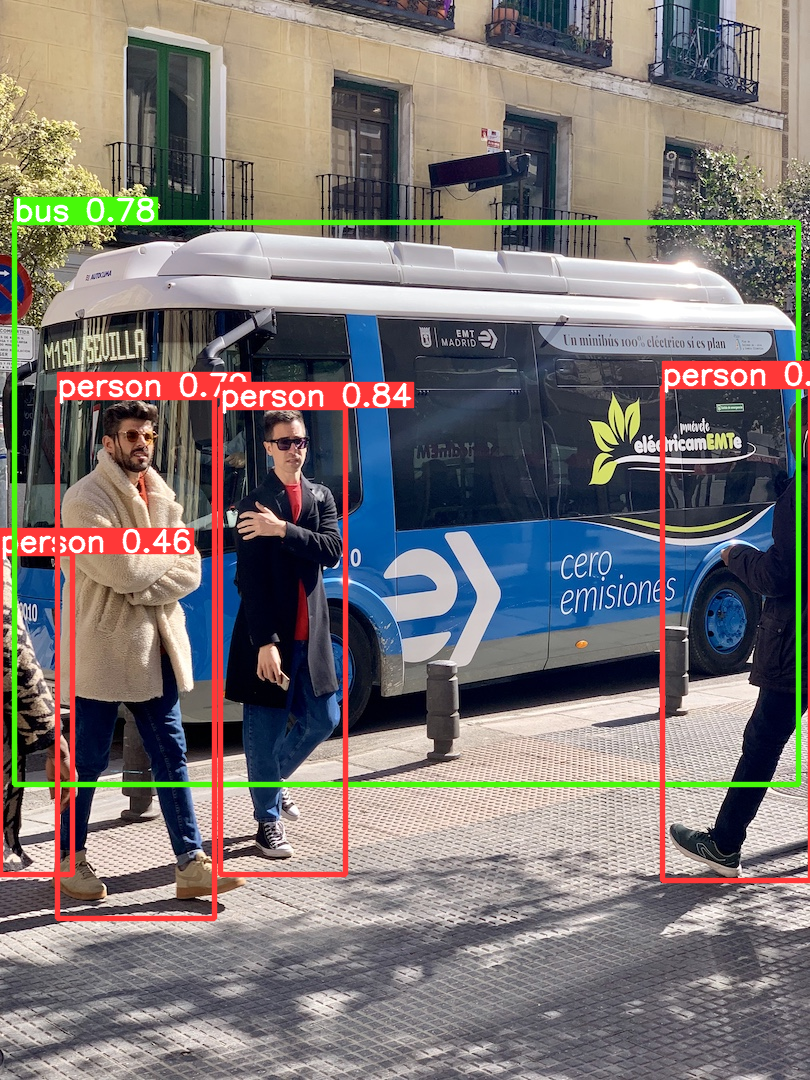

In [33]:
results.show()

In [35]:
# results in pandas
for idx, i in enumerate(imgs):
    print(results.pandas().xyxy[idx])


         xmin        ymin         xmax        ymax  confidence  class    name
0  742.896973   47.978546  1141.142212  716.822998    0.880723      0  person
1  442.038971  437.349854   496.719574  709.882935    0.687267     27     tie
2  125.215149  193.606750   710.841064  713.070251    0.642236      0  person
3  982.893311  308.404480  1027.329590  420.230042    0.263046     27     tie
         xmin        ymin        xmax        ymax  confidence  class    name
0  220.868454  407.421417  345.723846  874.687683    0.835148      0  person
1  662.574158  386.164673  810.000000  880.366516    0.828943      0  person
2   57.571323  397.307159  214.798233  918.241821    0.785363      0  person
3   14.668576  222.188995  798.409241  784.871155    0.781435      5     bus
4    0.000000  553.405945   72.457390  874.678101    0.464943      0  person


# Inference Settings
YOLOv5 models contain various inference attributes such as confidence threshold, IoU threshold, etc. which can be set by:

In [38]:
model.conf = 0.25  # NMS confidence threshold
iou = 0.45  # NMS IoU threshold
agnostic = False  # NMS class-agnostic
multi_label = False  # NMS multiple labels per box
classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
max_det = 1000  # maximum number of detections per image
amp = False  # Automatic Mixed Precision (AMP) inference

# these can be feed into the model by simply feeding it into the model setup
results = model(imgs, size=320)  # custom inference size

# Via Ultralytics pacakges

It's results output is of slightly different format, although it remains similar to that of pytorch hub versions.


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/jupyter/til-24-curriculum/cv_vlm/Unit_2/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


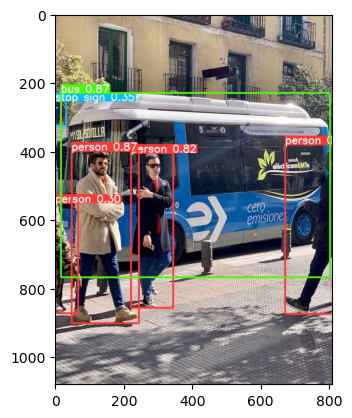

In [34]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
# load a custom model
# model = YOLO('path/to/best.pt') 

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='result.jpg') 
    # result.show()  # display to screen
    
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open('result.jpg'))

# Notes
There is also good information on the whole training on custom data on ultralytics page: 
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data.

# Datasets for detection/segmentation etc
- https://docs.ultralytics.com/datasets/detect/argoverse/